In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
from tensorflow import keras

## Step 1: Preprocess the Data

In [0]:
# Load the data
import pandas as pd
x_train = pd.read_csv('sales_data_training.csv')

In [0]:
x_train.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,0,1,0,1,0,0,132717,59.99
1,4.5,0,0,0,0,1,1,0,83407,49.99
2,3.0,0,0,0,0,1,1,0,62423,49.99
3,4.5,1,0,0,0,0,0,1,69889,39.99
4,4.0,1,0,1,0,1,0,1,161382,59.99


In [0]:
y_train = x_train.pop('total_earnings')

In [0]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [0]:
# Save the scaler
from sklearn.externals import joblib
joblib.dump(scaler, "scaler.pkl")  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['scaler.pkl']

In [0]:
# scaler = joblib.load("scaler.pkl")

In [0]:
# scaler.inverse_transform(x_train)

In [0]:
# x_train

## Step 2: Build the NN Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(50, input_shape=[9], activation='relu')) # 1st hidden layer
model.add(Dense(100, activation='relu')) # 2st hidden layer
model.add(Dense(200, activation='relu')) # 3st hidden layer
model.add(Dense(1, activation='linear')) # output layer

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


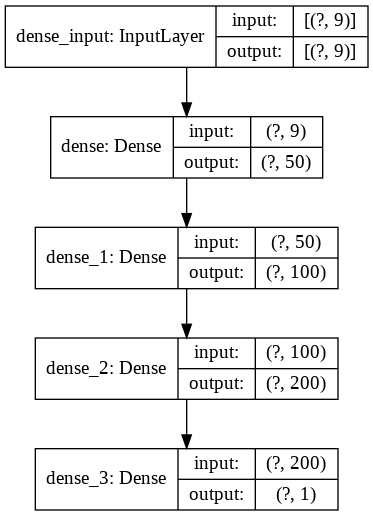

In [0]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

## Step 3: Compile the Model

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

## Step 4: Train the Model

In [0]:
history = model.fit(x_train,y_train,
                    epochs = 50,
                    batch_size = 32,
                    shuffle = True,
                    validation_split = 0.2)

Epoch 1/50
25/25 [==============================] - 0s 8ms/step - loss: 14488096768.0000 - val_loss: 13393984512.0000
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 14482454528.0000 - val_loss: 13380848640.0000
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 14446248960.0000 - val_loss: 13309982720.0000
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 14295712768.0000 - val_loss: 13059316736.0000
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 13852877824.0000 - val_loss: 12400920576.0000
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 12824623104.0000 - val_loss: 11033285632.0000
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 10929823744.0000 - val_loss: 8720856064.0000
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 8040916992.0000 - val_loss: 5649362944.0000
Epoch 9/50
25/25 [==============================] - 0s 3ms/

In [0]:
# history.history

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

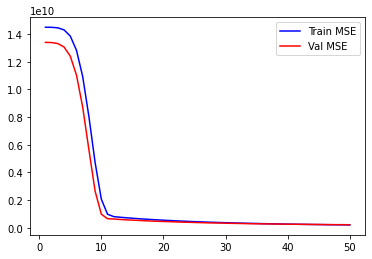

In [0]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

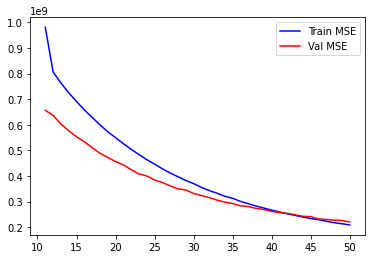

In [0]:
plt.plot(epochs[10:], loss[10:],'b',label='Train MSE')
plt.plot(epochs[10:], val_loss[10:],'r',label='Val MSE')
plt.legend()
plt.show()

## Step 5: Evaluate the Model

In [0]:
# Load the data
x_test = pd.read_csv('sales_data_testing.csv')

In [0]:
y_test = x_test.pop('total_earnings')

In [0]:
x_test = scaler.transform(x_test)

In [0]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 218324384.0000


218324384.0

## Step 6: Save Model

In [0]:
model.save('regression.h5')

## Step 7: Load Model and Prediction

In [0]:
y_pred= model.predict(x_test)
y_pred

array([[204357.83 ],
       [ 83602.28 ],
       [ 84397.68 ],
       [152302.08 ],
       [113918.92 ],
       [116530.78 ],
       [104348.93 ],
       [195258.73 ],
       [156280.33 ],
       [153731.83 ],
       [104811.13 ],
       [122046.38 ],
       [118631.65 ],
       [122863.22 ],
       [147144.55 ],
       [ 91167.46 ],
       [112448.38 ],
       [ 39570.48 ],
       [104811.13 ],
       [120688.71 ],
       [ 90372.05 ],
       [127397.516],
       [153731.83 ],
       [ 96066.695],
       [143327.31 ],
       [112448.38 ],
       [154149.92 ],
       [ 93600.88 ],
       [ 81710.31 ],
       [114682.93 ],
       [ 83602.29 ],
       [176307.12 ],
       [ 91271.586],
       [171711.86 ],
       [ 86676.336],
       [ 70345.28 ],
       [134962.7  ],
       [ 77313.95 ],
       [163013.39 ],
       [187580.7  ],
       [ 46057.7  ],
       [ 66367.016],
       [135971.02 ],
       [ 61165.383],
       [114653.375],
       [ 96683.67 ],
       [ 50158.797],
       [20018

In [0]:
single_record = [[3.5,1,	0,	1,	0,	1,	0,	0,	59.99]]

In [0]:
scaler = joblib.load("scaler.pkl")
single_scaled = scaler.transform(single_record)
single_scaled

array([[0.5, 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. ]])

In [0]:
from tensorflow.keras.models import load_model
model = load_model('regression.h5')

In [0]:
model.predict(single_scaled)

array([[134228.25]], dtype=float32)

# Challenge: Regression

In [0]:
# Load the data
import pandas as pd
x = pd.read_csv('boston.csv')

In [0]:
# medv: median house val
x.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
y = x.pop('medv')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2020) # reproduciblity

In [0]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
x_train.shape[1]

14

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))

In [0]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [0]:
history = model.fit(x_train,y_train,
                    epochs=50,
                    shuffle=True,
                    validation_split = 0.2)

Epoch 1/50
6/6 [==============================] - 0s 15ms/step - loss: 581.2770 - val_loss: 608.6283
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 552.0521 - val_loss: 571.8156
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 509.5418 - val_loss: 517.5619
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 446.2520 - val_loss: 435.8689
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 353.6753 - val_loss: 320.7601
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 236.8127 - val_loss: 187.8196
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 139.7338 - val_loss: 104.4846
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 129.2575 - val_loss: 94.0077
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 112.6614 - val_loss: 78.8732
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 85.7719 - val_loss: 76.6448
Ep

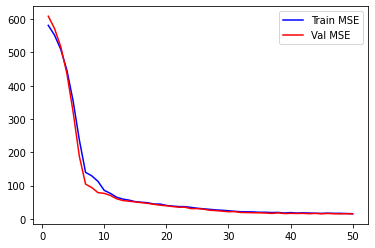

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 21.1206


21.120603561401367

In [0]:
y_pred= model.predict(x_test)
y_pred

array([[46.028446 ],
       [12.484126 ],
       [16.113998 ],
       [31.98072  ],
       [20.461908 ],
       [24.561792 ],
       [14.646041 ],
       [15.8342085],
       [22.111654 ],
       [35.28185  ],
       [26.870409 ],
       [19.52343  ],
       [40.159393 ],
       [18.703455 ],
       [19.503628 ],
       [11.738403 ],
       [ 8.646991 ],
       [26.098358 ],
       [28.037117 ],
       [23.672232 ],
       [18.161606 ],
       [23.561136 ],
       [25.877066 ],
       [17.97422  ],
       [14.20821  ],
       [24.94909  ],
       [23.555271 ],
       [20.808027 ],
       [22.437908 ],
       [10.082258 ],
       [38.272114 ],
       [24.92865  ],
       [22.052567 ],
       [15.150029 ],
       [21.987057 ],
       [41.53487  ],
       [31.590027 ],
       [18.268343 ],
       [39.533394 ],
       [19.102026 ],
       [24.128489 ],
       [20.943752 ],
       [22.013992 ],
       [17.614931 ],
       [50.232273 ],
       [21.53773  ],
       [26.16101  ],
       [11.86